<a href="https://colab.research.google.com/github/Kr1n3/Time-Series/blob/main/Time-Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pydataset pmdarima prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 62.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.1 MB/s eta 0:00:00
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=7ff47652e6d06f88d61b45c25d9dfdcb2ea3da274d57e

In [ ]:
import yfinance as yf
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.base import clone
from sklearn.model_selection import ParameterGrid

from pmdarima.arima import KPSSTest, auto_arima
plt.rcParams["figure.figsize"] = (20,10)

initiated datasets repo at: /root/.pydataset/


#Atividade 1

In [ ]:
#Coletar os dados do YFinance
def get_yfinance(id_name):
  df = yf.Ticker(id_name)
  return df.history(period="max")

In [ ]:
#Plotar gráfico de média movél
def show_trend(ts, ma_size):
  to_show = pd.DataFrame()

  to_show['serie'] = ts.values[ma_size:]
  to_show['MA']  = ts.rolling(ma_size).mean().values[ma_size:]
  to_show.plot()
  plt.show()

**Análise das ações da Gol**

In [ ]:
df_gol = get_yfinance('GOLL4.SA')
df_gol.reset_index(inplace=True)
df_gol = df_gol[df_gol['Date']<='2019-12-31']


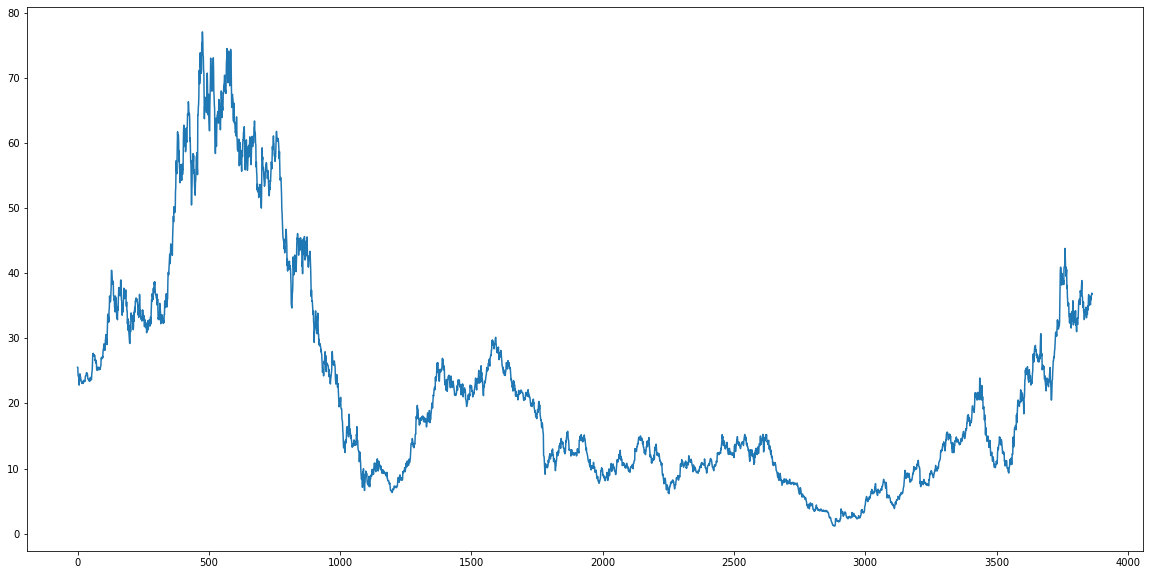

In [ ]:
df_gol['Close'].plot()

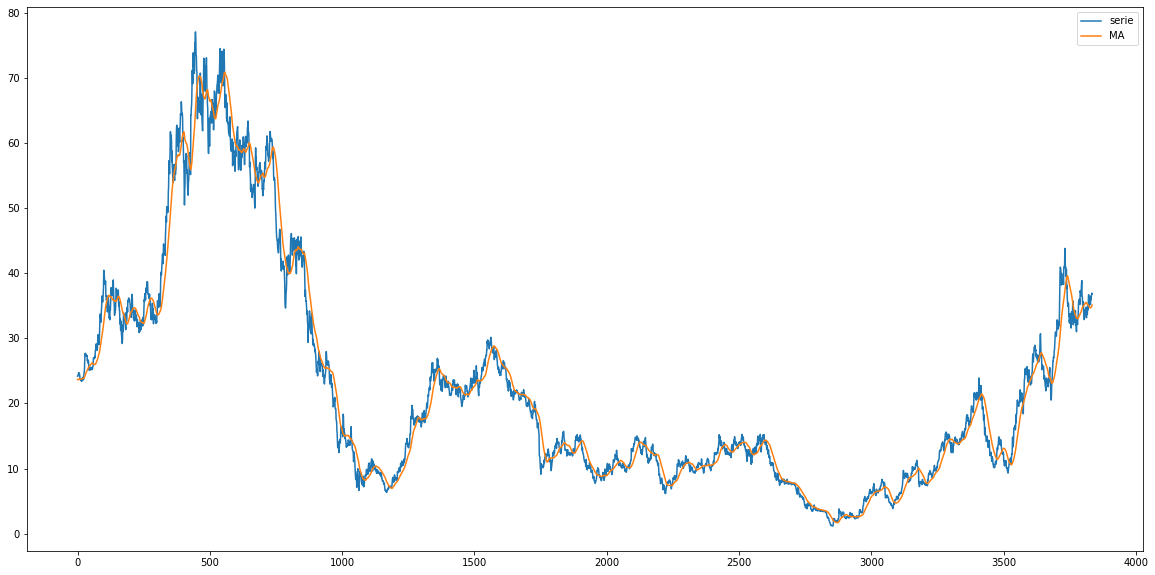

In [ ]:
#Média Movél
ts = df_gol['Close']
ma_size=30
show_trend(ts, ma_size)

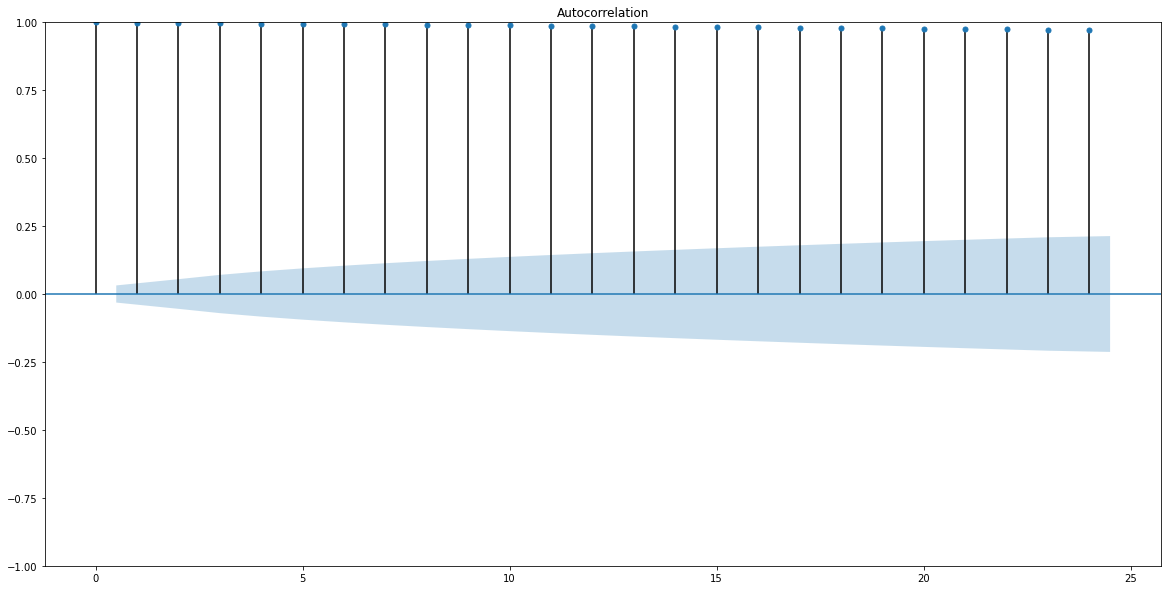

In [ ]:
#Gráfico de autocorrelação
sm.graphics.tsa.plot_acf(df_gol['Close'].values.squeeze(), lags=24)
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


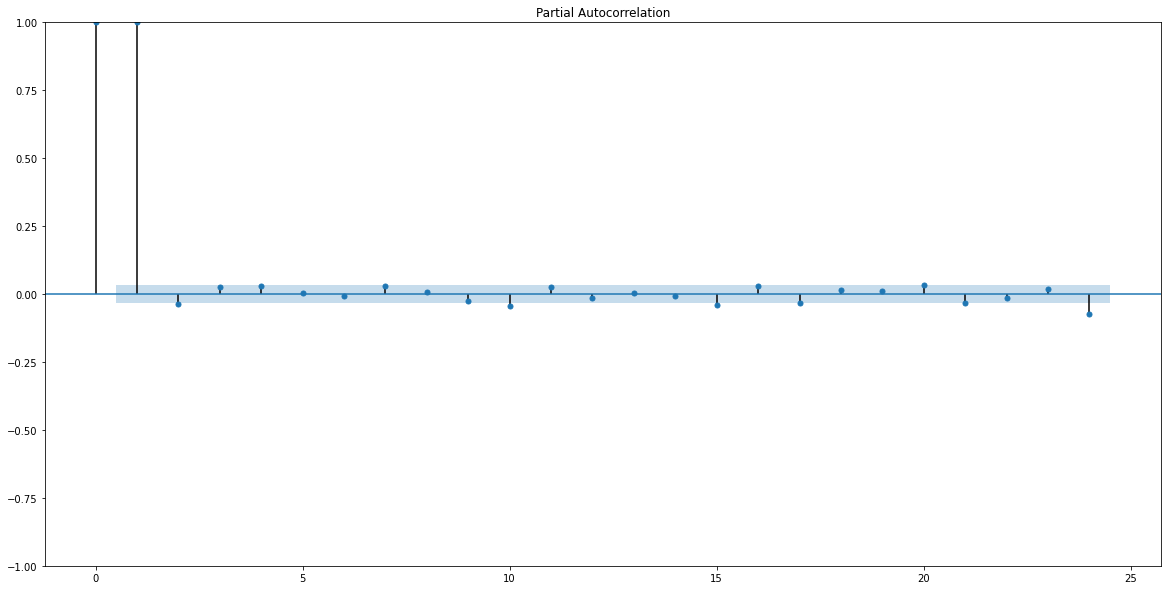

In [ ]:
#Gráfico de autocorrelação Parcial
sm.graphics.tsa.plot_pacf(df_gol['Close'].values.squeeze(), lags=24)
plt.show()


A serie da gol apresenta movimentos ciclicos.
Tem uma autocorrelação relevante, mas parcialmente não possui autocorrelações relevantes, sendo uma white noise. Não apresenta sazionalidade.

**Análise do dataset JohnsonJohnson**


In [ ]:
data('JohnsonJohnson', show_doc=True )

JohnsonJohnson

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Quarterly Earnings per Johnson & Johnson Share

### Description

Quarterly earnings (dollars) per Johnson & Johnson share 1960–80.

### Usage

    JohnsonJohnson

### Format

A quarterly time series

### Source

Shumway, R. H. and Stoffer, D. S. (2000) _Time Series Analysis and its
Applications_. Second Edition. Springer. Example 1.1.

### Examples

    require(stats); require(graphics)
    JJ <- log10(JohnsonJohnson)
    plot(JJ)
    ## This example gives a possible-non-convergence warning on some
    ## platforms, but does seem to converge on x86 Linux and Windows.
    (fit <- StructTS(JJ, type = "BSM"))
    tsdiag(fit)
    sm <- tsSmooth(fit)
    plot(cbind(JJ, sm[, 1], sm[, 3]-0.5), plot.type = "single",
         col = c("black", "green", "blue"))
    abline(h = -0.5, col = "grey60")
    monthplot(fit)




In [ ]:
df_johnson = data('JohnsonJohnson')

In [ ]:
df_johnson['date'] = pd.date_range(start = '1960-01-01', end='1981-01-01', freq='Q' )

In [ ]:
df_johnson.set_index('date', inplace=True)

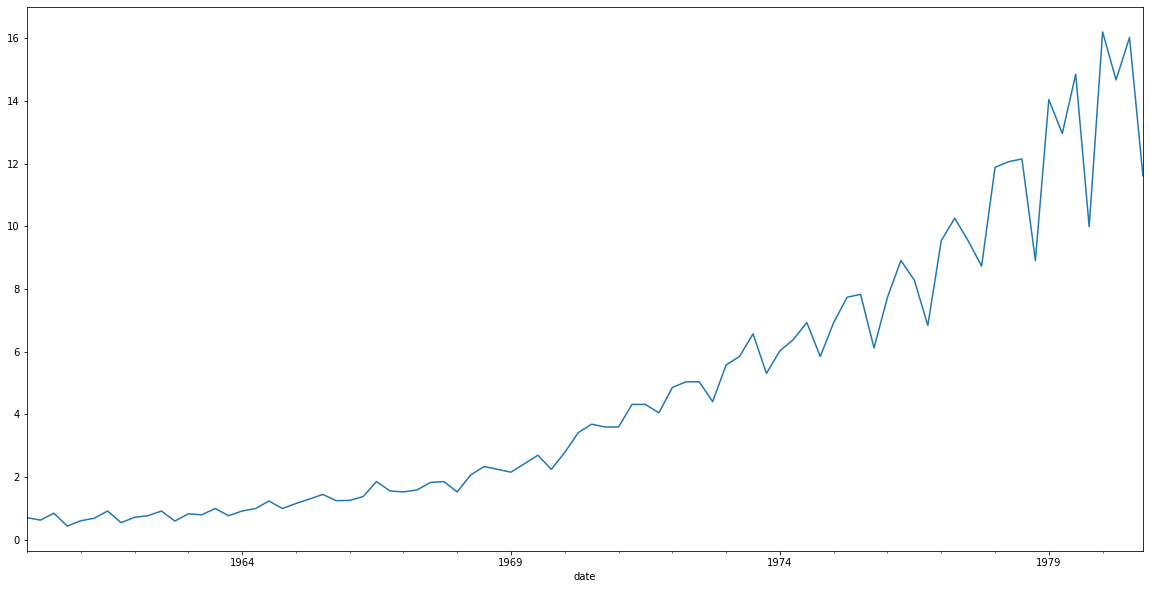

In [ ]:
df_johnson['JohnsonJohnson'].plot()

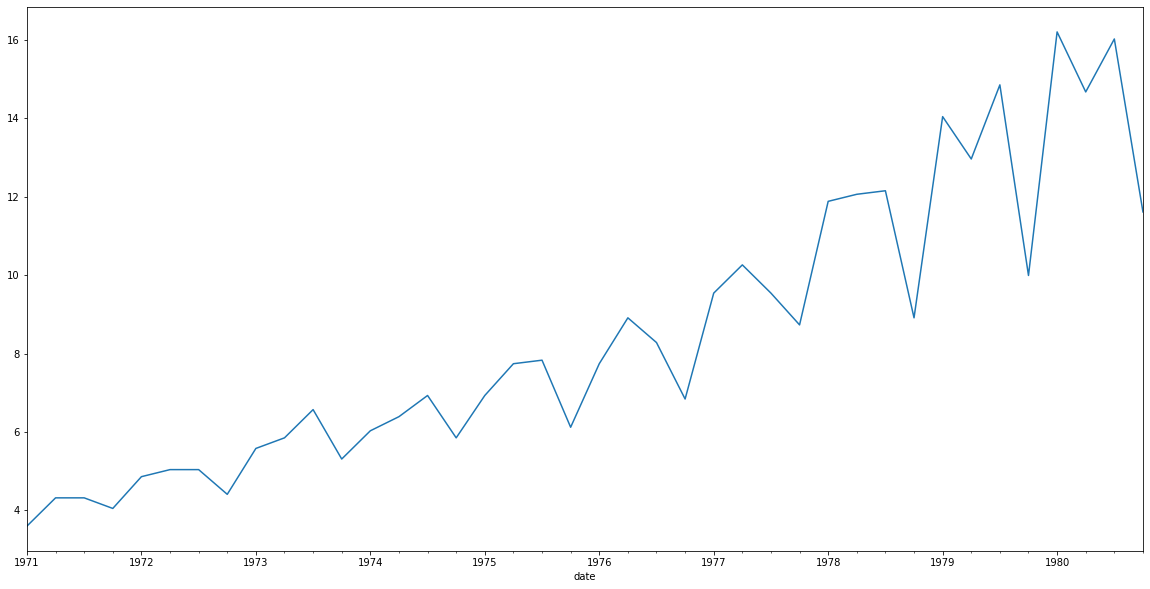

In [ ]:
df_johnson['JohnsonJohnson'].iloc[-40:].plot()

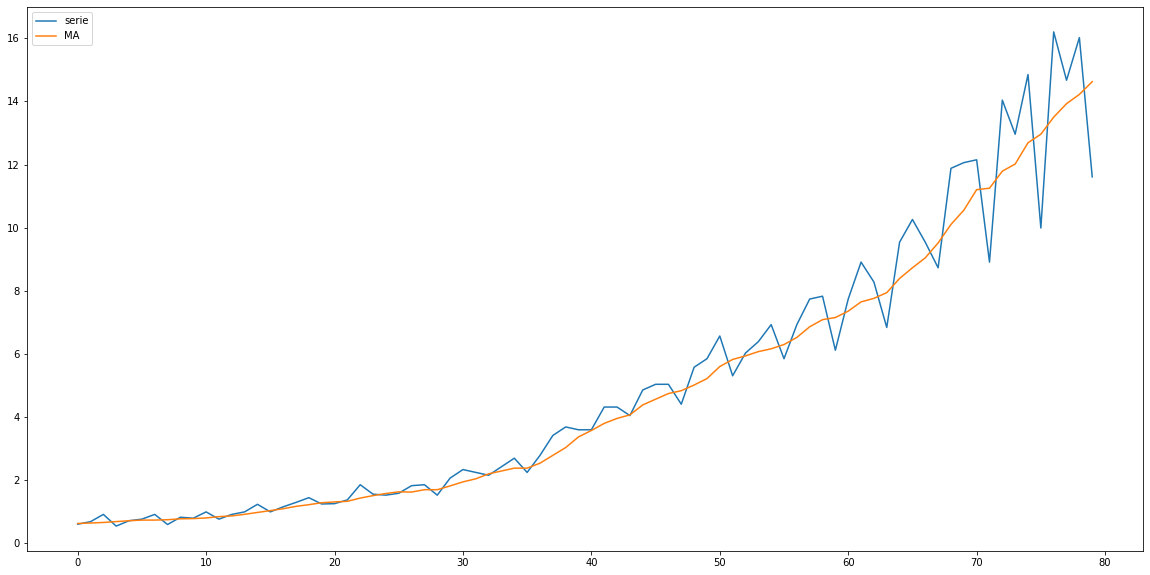

In [ ]:
#Média Movél 
ts = df_johnson['JohnsonJohnson']
ma_size=4
show_trend(ts, ma_size)

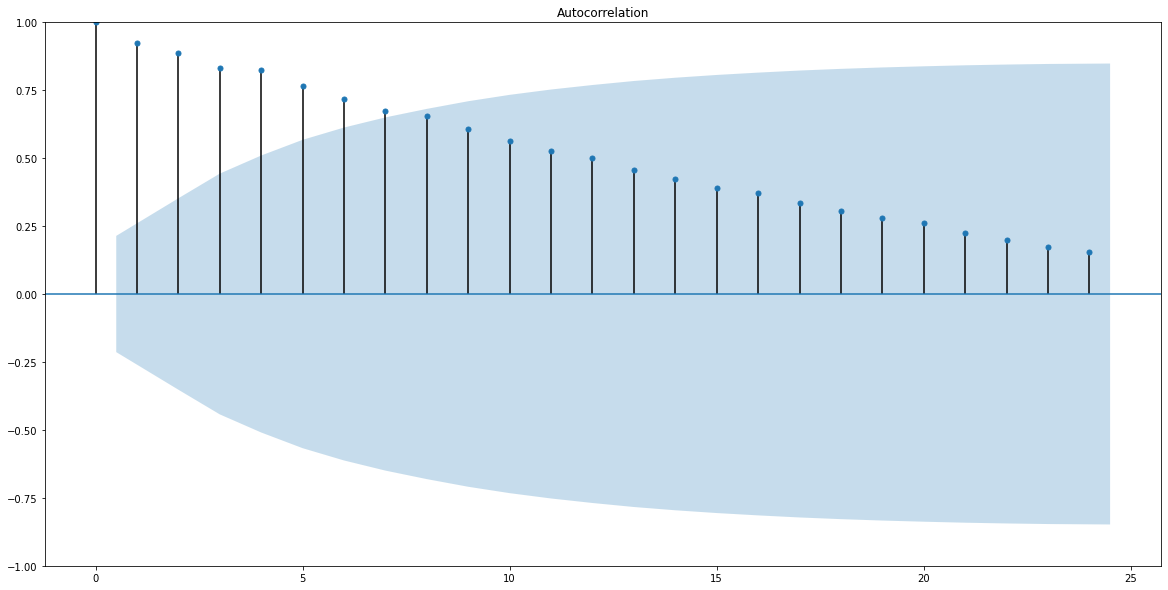

In [ ]:
#Gráfico de autocorrelação
sm.graphics.tsa.plot_acf(df_johnson['JohnsonJohnson'].values.squeeze(), lags=24)
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


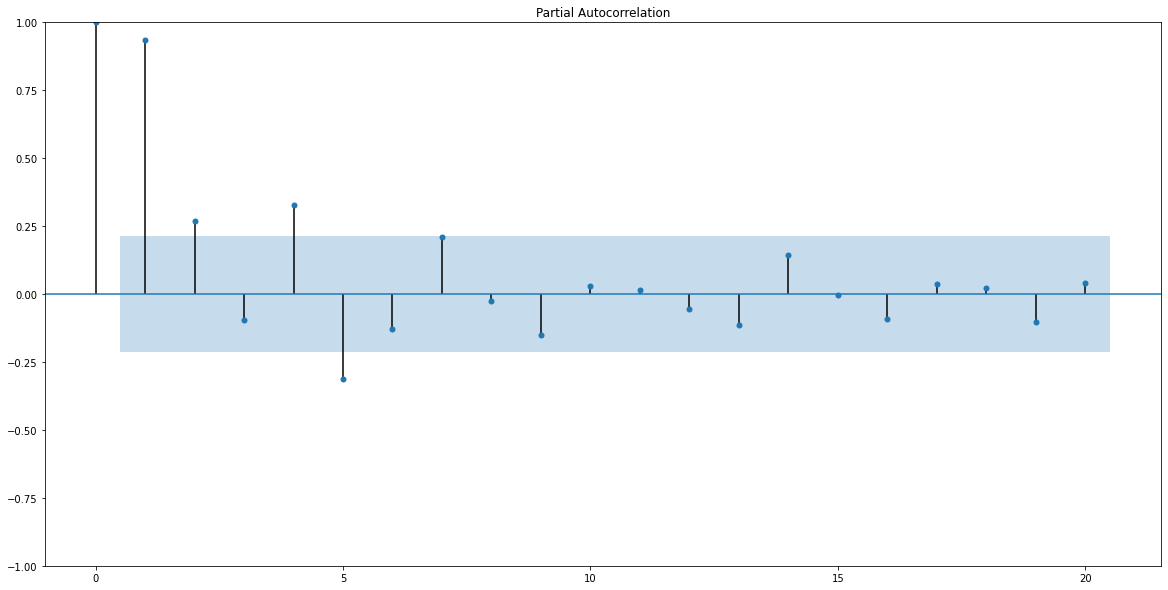

In [ ]:
#Gráfico de autocorrelação parcial
sm.graphics.tsa.plot_pacf(df_johnson['JohnsonJohnson'].values.squeeze(), lags=20)
plt.show()


A serie da JohnsonJohnson começou a apresentar sazionalidade no final, com quedas no Q4 nos ultimos anos. 
A sua autocorrelação diminuiu ao longo dos anos, mostrando que a empresa estava em crescimento.


**Análise do dataset Sem Nome**


In [ ]:
df_semnome = pd.read_csv("sem_nome.csv")

In [ ]:
df_semnome

,Unnamed: 0,actual
0,0,-0.852753
1,1,-1.703346
2,2,-0.451841
3,3,0.392410
4,4,0.498923
...,...,...
995,995,-1.343438
996,996,0.199716
997,997,0.639731
998,998,1.013807


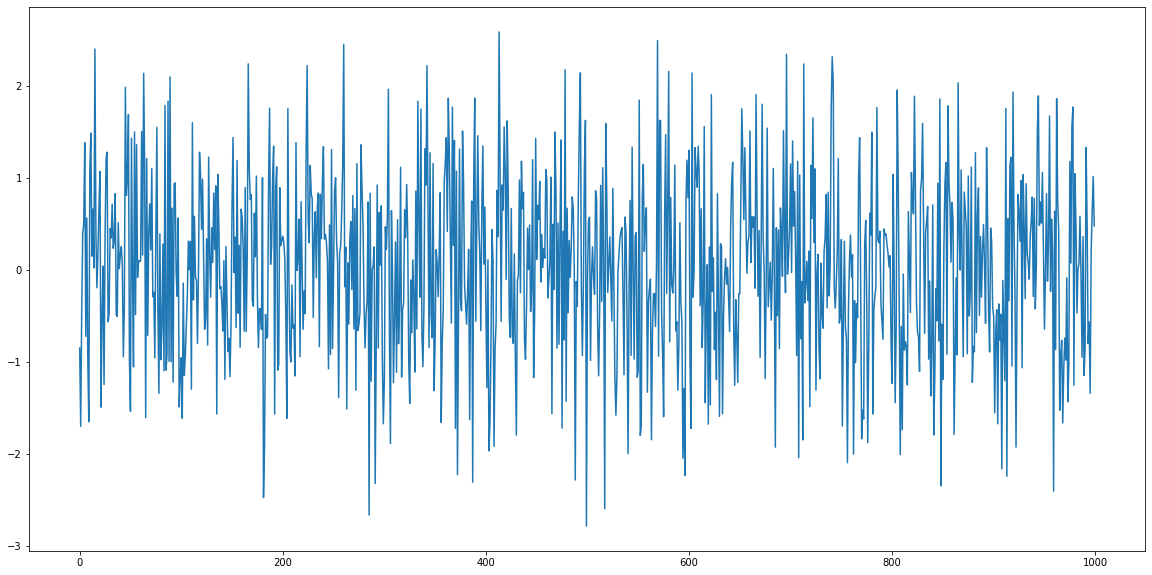

In [ ]:
df_semnome['actual'].plot()

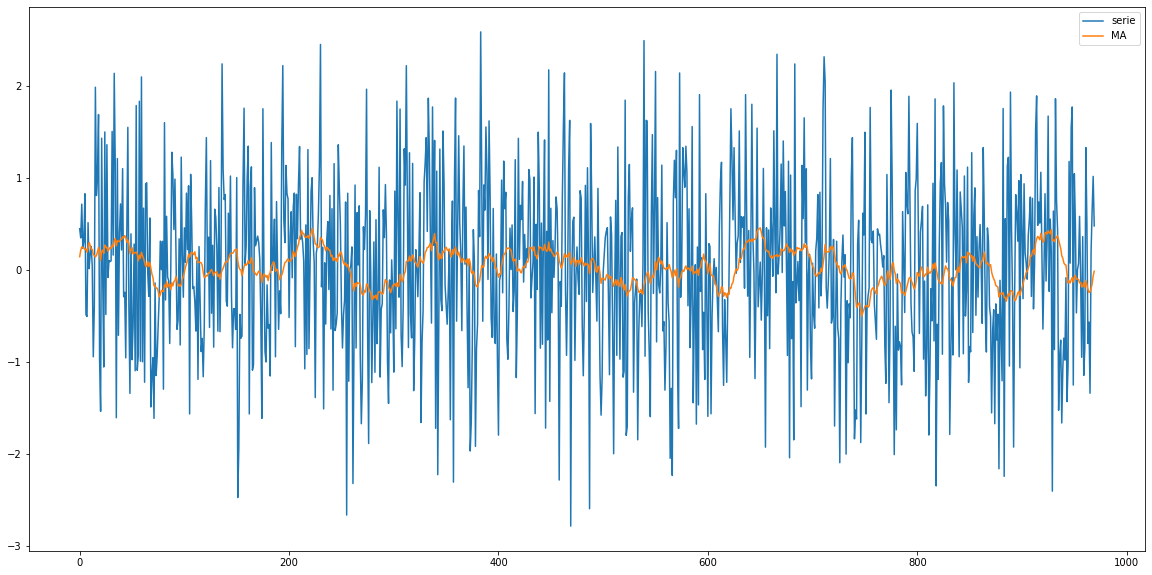

In [ ]:
#Média Movél 
ts = df_semnome['actual']
ma_size=30
show_trend(ts, ma_size)

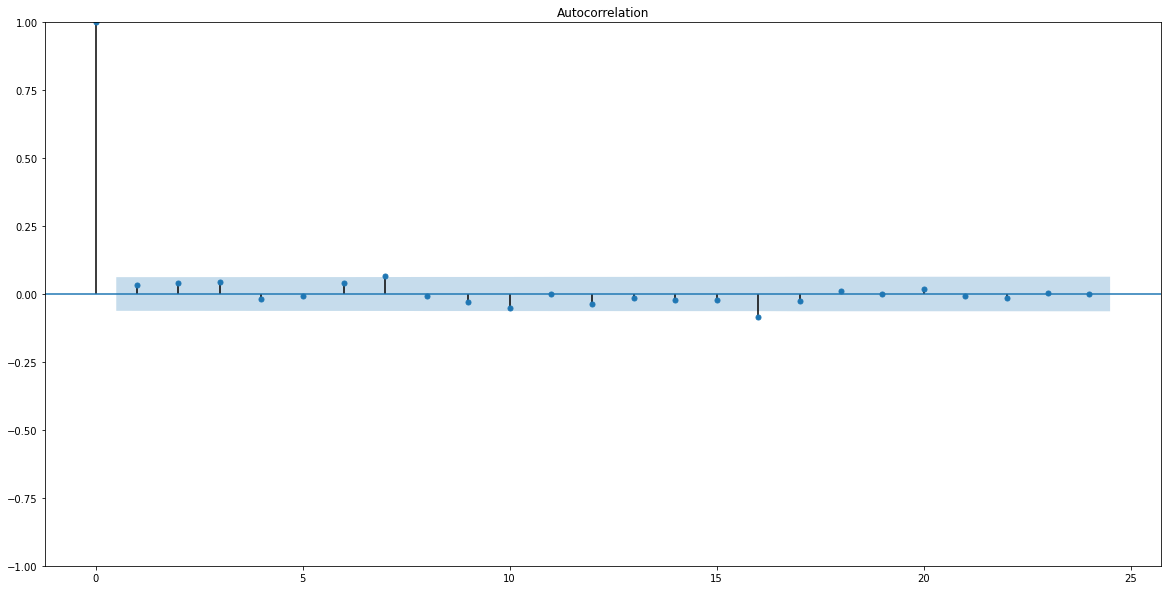

In [ ]:
#Gráfico de autocorrelação
sm.graphics.tsa.plot_acf(df_semnome['actual'].values.squeeze(), lags=24)
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


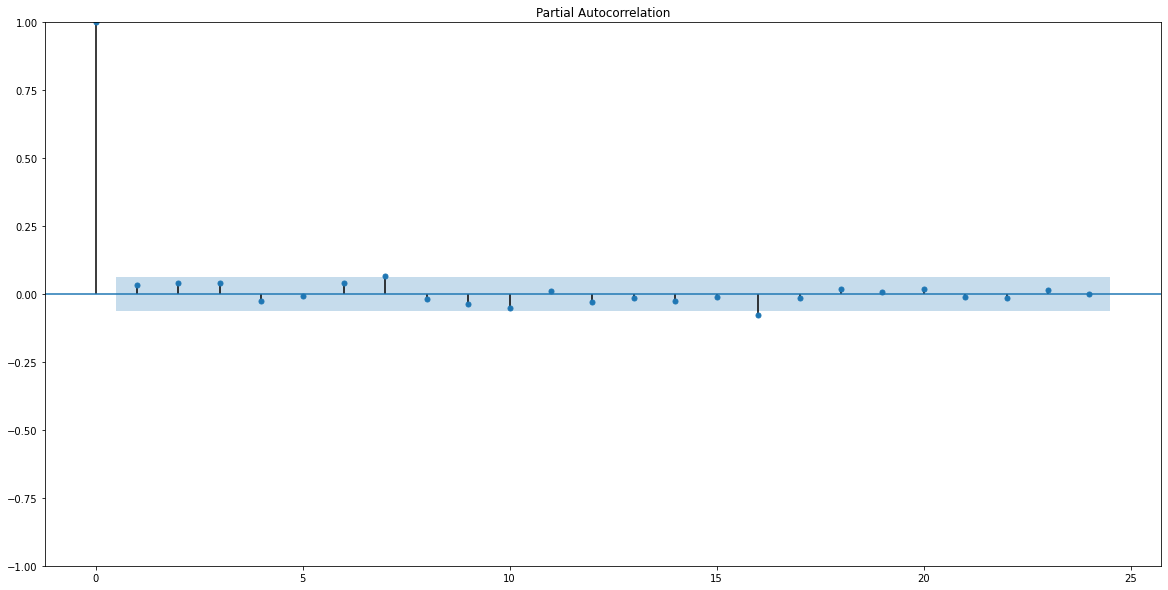

In [ ]:
#Gráfico de autocorrelação parcial
sm.graphics.tsa.plot_pacf(df_semnome['actual'].values.squeeze(), lags=24)
plt.show()

A Serie sem nome não apresenta tendência nem sazonalidade, e sua aucorrelação não é relevante tanto na normal quanto na parcial, sendo uma white noise e estacionária. 

#Atividade 2 e 3


**Análise das ações da Gol**

In [ ]:
#Função de diferenciação
def difference(ts, interval=1):
  diff = list()

  for t in range(interval, ts.shape[0]):
    value = ts[t] - ts[t - interval]
    diff.append(value)

  return pd.Series(diff)

In [ ]:
#Função calcular o auto arima
def arima_fit_predict(ts, m, test_size):
  ts_train = ts[0:-test_size]
  ts_test = ts[-test_size:]

  print(f'training shape {ts_train.shape}')
  print(f'test shape {ts_test.shape}')

  model = auto_arima(ts_train.values, # X=None,
                    start_p=2, d=None, start_q=2, 
                    max_p=5, max_d=2, max_q=5, start_P=1, D=None,
                    start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=m, trace=True, maxiter=10)
 
  direct_prev = model.predict(test_size)

  prevs_1_step = []
  for i in tqdm(ts_test):
    prevs_1_step.append(model.predict(1)[0])
    model.update(i)

  df_result = pd.DataFrame({
                          'arima_direct': direct_prev ,
                          'arima_1step': prevs_1_step,
                          'real': ts_test.values
                          })
  return df_result

In [ ]:
#Função para calcular as métricas de desempenho 
def mean_square_error(y_true, y_pred):
    y_true = np.asmatrix(y_true).reshape(-1)
    y_pred = np.asmatrix(y_pred).reshape(-1)

    return np.square(np.subtract(y_true, y_pred)).mean()

def root_mean_square_error(y_true, y_pred):

    return mean_square_error(y_true, y_pred)**0.5


def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)

    if len(np.where(y_true == 0)[0]) > 0:
        return np.inf
    else:
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def mean_absolute_error(y_true, y_pred):
    
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)

    return np.mean(np.abs(y_true - y_pred))


def u_theil(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)

    error_sup = np.square(np.subtract(y_true, y_pred)).sum()
    error_inf = np.square(np.subtract(y_pred[0:(len(y_pred) - 1)], y_pred[1:(len(y_pred))])).sum()

    return error_sup / error_inf


def average_relative_variance(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    mean = np.mean(y_true)

    error_sup = np.square(np.subtract(y_true, y_pred)).sum()
    error_inf = np.square(np.subtract(y_pred, mean)).sum()

    return error_sup / error_inf


def prediction_of_change_in_direction(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)

    true_sub = np.subtract(y_true[0:(len(y_true) - 1)], y_true[1:(len(y_true))])
    pred_sub = np.subtract(y_pred[0:(len(y_pred) - 1)], y_pred[1:(len(y_pred))])

    mult = true_sub * pred_sub
    result = 0
    for m in mult:
        if m > 0:
            result = result + 1

    return (100 * (result / len(y_true)))


def gerenerate_metric_results(y_true, y_pred):
    
    return {'MSE': mean_square_error(y_true, y_pred),
            'RMSE':root_mean_square_error(y_true, y_pred),
            'MAPE': mean_absolute_percentage_error(y_true, y_pred),
            'MAE': mean_absolute_error(y_true, y_pred),
            'theil': u_theil(y_true, y_pred),
            'ARV': average_relative_variance(y_true, y_pred),
            'POCID': prediction_of_change_in_direction(y_true, y_pred)}

In [ ]:
#Função para criação dos modelos 
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff).values

def inverse_difference(last_ob, value):
    return value + last_ob

def get_inverse_difference(last_ob,value):
     return [inverse_difference(last_ob[i], value[i]) for i in range(len(value))]
     
def create_windowing(ts, lag_size):
    df_final = None

    for i in range(0, (lag_size+1)):
        serie = ts.shift(i)
        if i==0:
          serie.name = 'actual'
        else:
          serie.name = f'lag_{i}'

        df_final = pd.concat([serie , df_final], axis=1)

    return df_final.dropna()

def holdout(actual_model, x_insampe, y_insampe, val_size):
  x_train = x_insampe[0:-val_size]
  y_train = y_insampe[0:-val_size]

  x_val = x_insampe[-val_size:]
  y_val = y_insampe[-val_size:]

  actual_model.fit(x_train, y_train.flatten())

  y_pred = actual_model.predict(x_val)

  return mean_absolute_error(y_val, y_pred)

def grid_search(base_model, list_params, x_insampe, 
                y_insampe, val_size):
  
  list_result = []
  for params in list_params:
    actual_model = clone(base_model).set_params(**params)
    val_metric = holdout(actual_model, x_insampe, y_insampe, val_size)
    list_result.append(val_metric)

  return list_result


def fit_predict_sklearn(ts, test_size, horizon, lag_size, 
                        model_sklearn, use_diff, list_params):
  # criacao de diferenca
  if use_diff:
    diff_ts = pd.Series(difference(ts.values, interval=horizon))
  else:
    diff_ts = ts

  # criacao da janela
  df_lagged_air = create_windowing(diff_ts , (lag_size+(horizon-1)))
  horizon_col = [f'actual_{i}' for i in range(1, horizon)] 
  lags_cols = [f'lag_{i}' for i in reversed(range(1, lag_size+1))]

  df_lagged_air.columns = lags_cols + horizon_col + ['actual']
  df_lagged_air.drop(columns=horizon_col, inplace=True)

  # treino e teste
  x_train = df_lagged_air.iloc[0:-test_size].drop(columns='actual').values
  y_train = df_lagged_air.iloc[0:-test_size]['actual'].values.reshape(-1, 1)

  x_test= df_lagged_air.iloc[-test_size:].drop(columns='actual').values
  y_test = df_lagged_air.iloc[-test_size:]['actual'].values.reshape(-1, 1)

  scaler_x = MinMaxScaler()
  scaler_y = MinMaxScaler()

  scaler_x.fit(x_train)
  scaler_y.fit(y_train)

  x_train_norm = scaler_x.transform(x_train)
  y_train_norm = scaler_y.transform(y_train)

  x_test_norm = scaler_x.transform(x_test)

  val_metrics = grid_search(model_sklearn, list_params, x_train_norm, 
                            y_train_norm, test_size)
  
  best_index = np.argmin(val_metrics)
  best_param = list_params[best_index]
  best_model = clone(model_sklearn).set_params(**best_param)
  best_model.fit(x_train_norm, y_train_norm.flatten())
  prevs = best_model.predict(x_test_norm)

  prevs = scaler_y.inverse_transform(prevs.reshape(-1, 1)).flatten()
  if use_diff:
    base_inverse_diff = ts.values[-(test_size+horizon):-horizon]

    prevs = get_inverse_difference(base_inverse_diff, prevs)

  return prevs

In [ ]:
#KPSS Test
kps = KPSSTest()
kps.should_diff(df_gol['Close'])

(0.01, True)

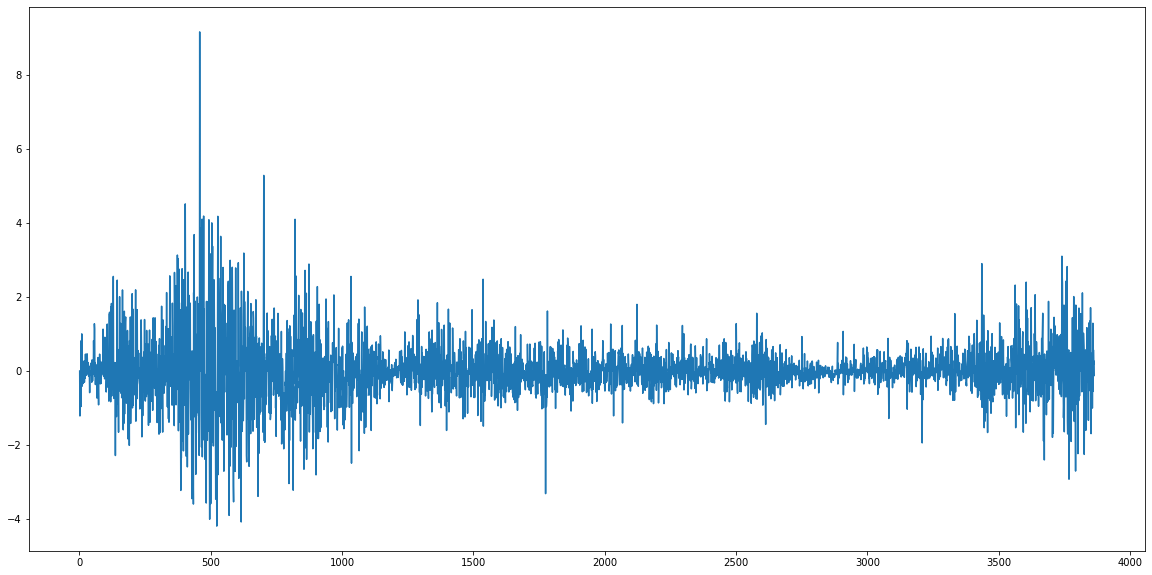

In [ ]:
#Diferenciação com o .diff()
df_gol_dif= df_gol['Close'].diff()
df_gol_dif.plot()

In [ ]:
#Diferenciação com a função difference
ts = df_gol['Close']
dif_gol = difference(ts) 

In [ ]:
kps.should_diff(dif_gol)

(0.1, False)

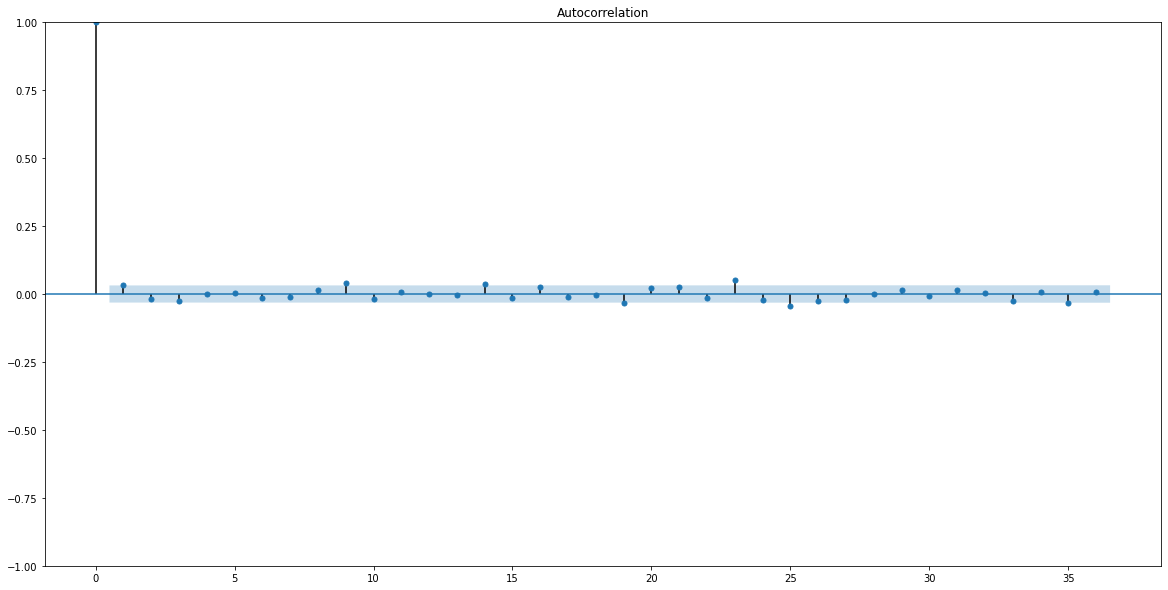

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


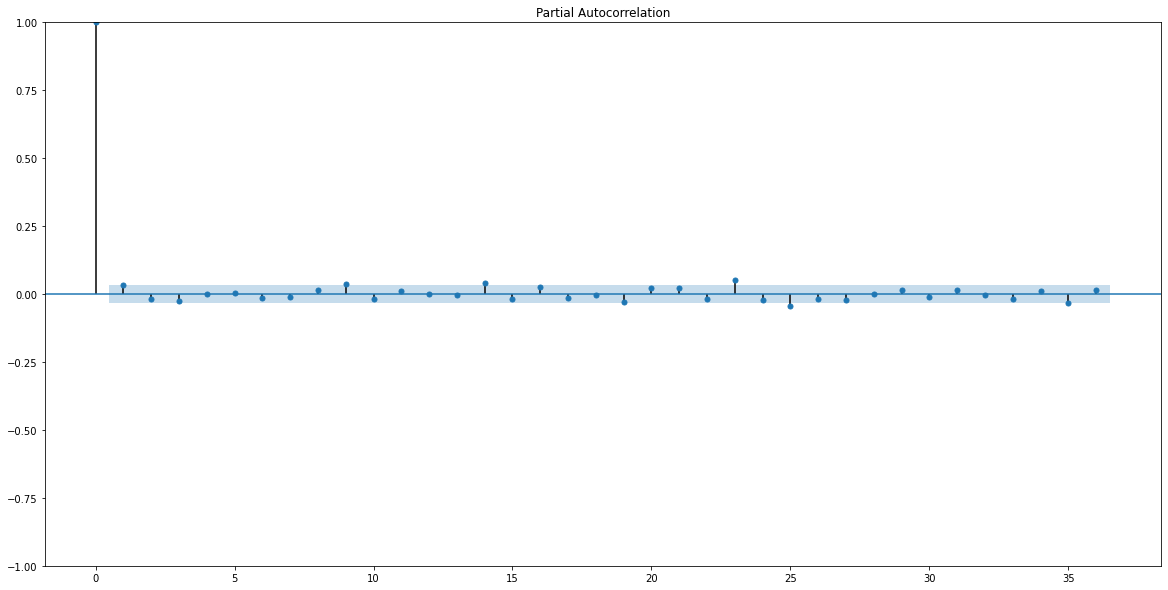

In [ ]:
sm.graphics.tsa.plot_acf(dif_gol, lags=36)
plt.show()
sm.graphics.tsa.plot_pacf(dif_gol, lags=36)
plt.show()

In [ ]:
model_gol = auto_arima(df_gol['Close'], # X=None,
           start_p=2, d=None, start_q=2, 
           max_p=5, max_d=2, max_q=5, start_P=1, D=None,
           start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, trace=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9144.236, Time=4.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9143.287, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9141.440, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9141.299, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9141.339, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9142.886, Time=3.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9142.250, Time=1.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9142.714, Time=5.44 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9139.348, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9140.936, Time=1.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9140.302, Time=0.75 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9139.489, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9140.778, Time=1.66 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 22.404 seconds


In [ ]:
ts = df_gol['Close']
test_size_gol = int(0.2 * ts.shape[0])
test_size_gol

773

In [ ]:
model_gol.predict(test_size_gol)

3865    36.795795
3866    36.795795
3867    36.795795
3868    36.795795
3869    36.795795
          ...    
4633    36.795795
4634    36.795795
4635    36.795795
4636    36.795795
4637    36.795795
Length: 773, dtype: float64

In [ ]:
#arima_fit_predict
prev_gol = arima_fit_predict(df_gol['Close'], 1, 773)

training shape (3092,)
test shape (773,)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7495.836, Time=2.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7495.204, Time=0.86 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7493.679, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7493.586, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7493.394, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7495.442, Time=3.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.078 seconds


100%|██████████| 773/773 [00:59<00:00, 13.03it/s]


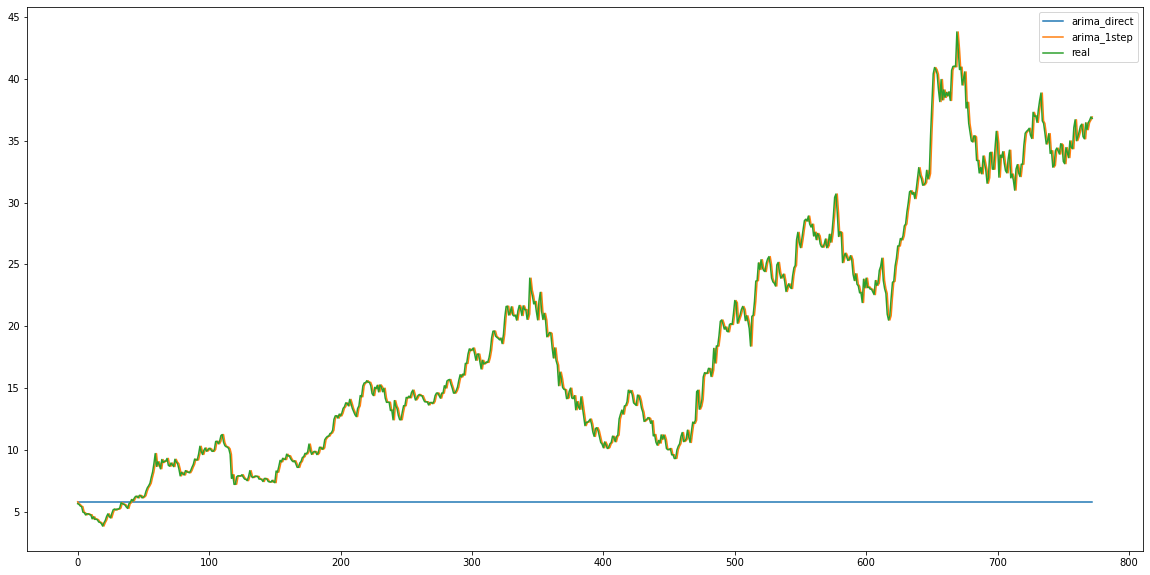

In [ ]:
prev_gol.plot()

In [ ]:
prev_gol.head()

,arima_direct,arima_1step,real
0,5.81,5.81,5.66
1,5.81,5.66,5.60
2,5.81,5.60,5.47
3,5.81,5.47,5.42
4,5.81,5.42,4.97


In [ ]:
list_result = []
for m in ['arima_direct', 'arima_1step']:

  dict_result = gerenerate_metric_results(prev_gol['real'], prev_gol[m])
  dict_result['name'] = m
  list_result.append(dict_result)

pd.DataFrame(list_result)

<ipython-input-27-47514fd6f107>:38: RuntimeWarning: divide by zero encountered in double_scalars
  return error_sup / error_inf


,MSE,RMSE,MAPE,MAE,theil,ARV,POCID,name
0,262.294818,16.195518,59.253343,12.908629,inf,1.59699,0.000000,arima_direct
1,0.473561,0.688157,2.662169,0.473053,1.000039,0.00484,48.641656,arima_1step


In [ ]:
parameters = {'hidden_layer_sizes': [20, 50, 100], 
                'max_iter': [1000],
                'tol': [0.001, 0.0001, 0.00001],
            }

list_params = list(ParameterGrid(parameters))

lag_size = 90
horizon = 1
test_size = 773
ts = df_gol['Close']
model_sklearn = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic'
                            , solver='adam', learning_rate_init=0.01, 
                            power_t=0.5, max_iter=100000, random_state=None,
                            tol=0.0001 )
use_diff = True
prevs_mlp_1step = fit_predict_sklearn(ts, test_size, horizon, lag_size,
                                      model_sklearn, use_diff, list_params)


In [ ]:
parameters = {'C':[1, 10, 100 ], 'gamma': [0.1, 0.01, 0.001],
                  'kernel':["rbf"],
                  'epsilon': [0.1, 0.01, 0.001]
            }
list_params = list(ParameterGrid(parameters))


lag_size = 90
horizon = 1
test_size = 773
ts = df_gol['Close']
model_sklearn = SVR()
use_diff = True

prevs_svr_1step = fit_predict_sklearn(ts, test_size, horizon, lag_size,
                                      model_sklearn, use_diff, list_params)


In [ ]:
prev_gol['prevs_mlp_1step'] = prevs_mlp_1step
prev_gol['prevs_svr_1step'] = prevs_svr_1step

In [ ]:
list_result = []

for m in ['arima_1step', 'prevs_mlp_1step', 
        'prevs_svr_1step']:

  dict_result = gerenerate_metric_results(prev_gol['real'], 
                                          prev_gol[m])
  dict_result['name'] = m
  list_result.append(dict_result)

pd.DataFrame(list_result)

,MSE,RMSE,MAPE,MAE,theil,ARV,POCID,name
0,0.473561,0.688157,2.662169,0.473053,1.000039,0.004840,48.641656,arima_1step
1,0.504510,0.710289,2.879296,0.498586,1.036507,0.005134,49.935317,prevs_mlp_1step
2,0.475651,0.689675,2.657361,0.473247,0.989255,0.004862,50.064683,prevs_svr_1step


Entre os modelos usados na serie da Gol o Arima teve melhores resultados no geral, mesmo tendo Theil um pouco acima de 1, o MSE, RMSE, MAPE e MAE se sairam melhor no Arima que nos outros modelos. Nesse caso o Arima seria escolhido por ter se saido melhor.

**Análise do dataset JohnsonJohnson**


In [ ]:
#KPSS Test
kps = KPSSTest()
kps.should_diff(df_johnson['JohnsonJohnson'])

(0.01, True)

In [ ]:
#Diferenciação com a função difference
ts = df_johnson['JohnsonJohnson']
dif_johnson = difference(ts) 

In [ ]:
kps.should_diff(dif_johnson)

(0.1, False)

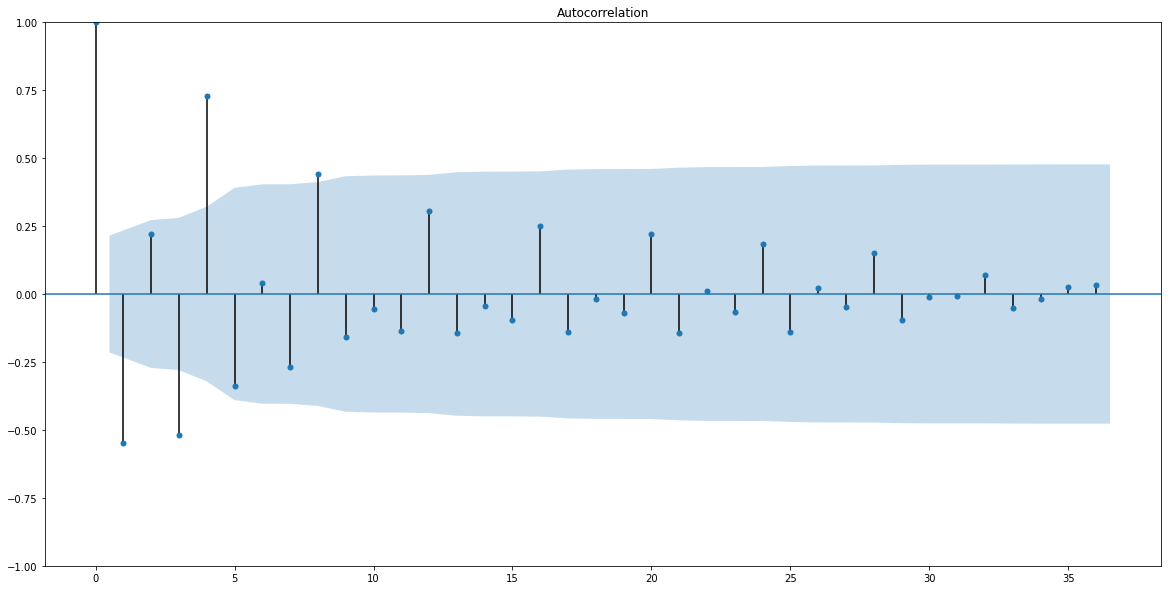

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


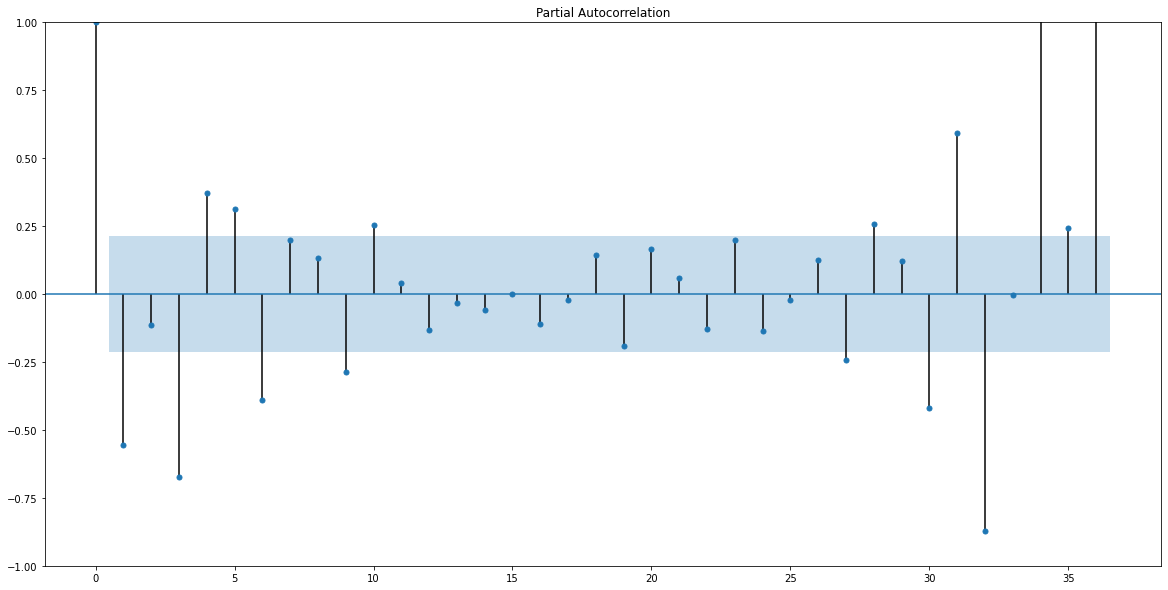

In [ ]:
sm.graphics.tsa.plot_acf(dif_johnson, lags=36)
plt.show()
sm.graphics.tsa.plot_pacf(dif_johnson, lags=36)
plt.show()

In [ ]:
auto_arima(df_johnson['JohnsonJohnson'], # X=None,
           start_p=2, d=None, start_q=2, 
           max_p=5, max_d=2, max_q=5, start_P=1, D=None,
           start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=4, trace=True, maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=101.138, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=145.581, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=102.161, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=100.715, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=100.126, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=100.714, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=102.716, Time=0.24 sec
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=98.208, Time=0.21 sec
 ARIMA(1,1,1)(1,1,0)[4]             : AIC=100.168, Time=0.30 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=101.393, Time=0.22 sec
 ARIMA(1,1,1)(1,1,1)[4]             : AIC=102.175, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=100.207, Time=0.10 sec
 ARIMA(2,1,1)(0,1,0)[4]             : AIC=98.215, Time=0.18 sec
 ARIMA(1,1,2)(0,1,0)[4]             : AIC=96.698, Time=0.25 sec
 ARIMA(1,1,2)(1,1,0)[4]             : AIC=98.259, 

ARIMA(maxiter=10, order=(1, 1, 3), scoring_args={}, seasonal_order=(0, 1, 0, 4),
      suppress_warnings=True)

In [ ]:
#arima_fit_predict
prev_johnson = arima_fit_predict(df_johnson['JohnsonJohnson'], 4, 16)

training shape (68,)
test shape (16,)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=35.300, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=36.828, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=33.796, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=23.403, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=23.993, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=25.341, Time=0.09 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=25.182, Time=0.12 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=23.404, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=27.387, Time=0.19 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=37.421, Time=0.05 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=25.136, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[4]             : AIC=22.924, Time=0.09 sec
 ARIMA(0,1,2)(0,1,0)[4]             : AIC=22.197, Time=0.06 sec
 ARIMA(0,1,2)(1,1,0)[4]             : AIC=22.973, Time=0.12 sec
 ARIMA(0,1,2)(1,1,1)[4]

100%|██████████| 16/16 [00:00<00:00, 16.26it/s]


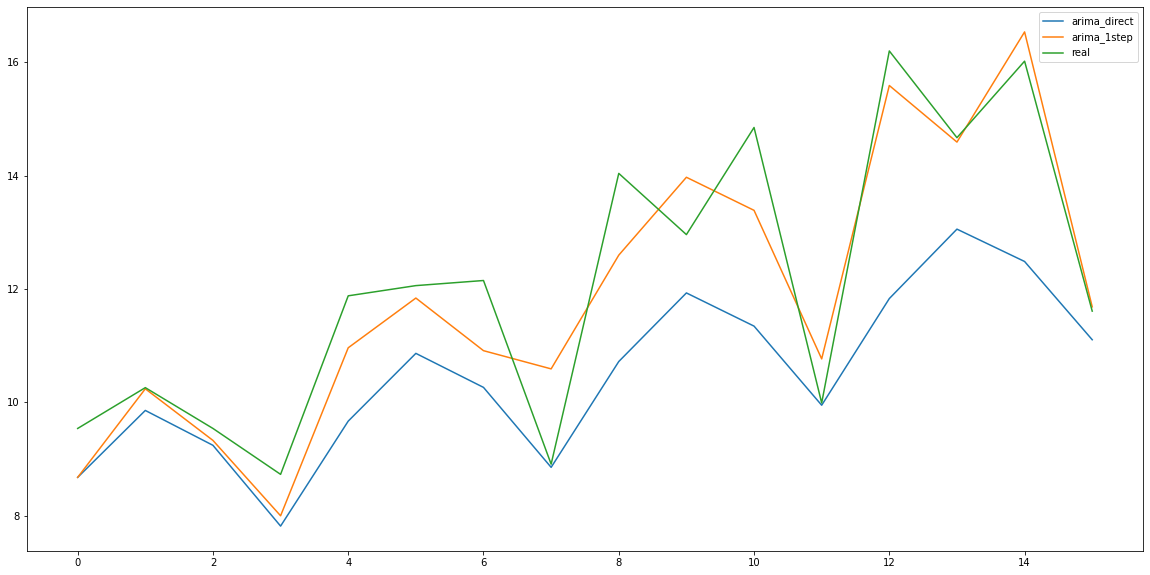

In [ ]:
prev_johnson.plot()

In [ ]:
prev_johnson.head()

,arima_direct,arima_1step,real
0,8.677051,8.677051,9.54
1,9.857700,10.239438,10.26
2,9.242519,9.328893,9.54
3,7.817338,7.999178,8.73
4,9.669208,10.963279,11.88


In [ ]:
list_result = []
for m in ['arima_direct', 'arima_1step']:

  dict_result = gerenerate_metric_results(prev_johnson['real'], prev_johnson[m])
  dict_result['name'] = m
  list_result.append(dict_result)

pd.DataFrame(list_result)

,MSE,RMSE,MAPE,MAE,theil,ARV,POCID,name
0,4.406188,2.099092,11.948169,1.608617,2.762019,0.962729,62.5,arima_direct
1,0.816557,0.903636,6.392782,0.740751,0.162796,0.145063,75.0,arima_1step


In [ ]:
parameters = {'hidden_layer_sizes': [20, 50, 100], 
                'max_iter': [1000],
                'tol': [0.001, 0.0001, 0.00001],
            }

list_params = list(ParameterGrid(parameters))

lag_size = 4
horizon = 1
test_size = 16
ts = df_johnson['JohnsonJohnson']
model_sklearn = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic'
                            , solver='adam', learning_rate_init=0.01, 
                            power_t=0.5, max_iter=100000, random_state=None,
                            tol=0.0001 )
use_diff = True
prevs_mlp_1step = fit_predict_sklearn(ts, test_size, horizon, lag_size,
                                      model_sklearn, use_diff, list_params)


In [ ]:
parameters = {'C':[1, 10, 100 ], 'gamma': [0.1, 0.01, 0.001],
                  'kernel':["rbf"],
                  'epsilon': [0.1, 0.01, 0.001]
            }
list_params = list(ParameterGrid(parameters))


lag_size = 4
horizon = 1
test_size = 16
ts = df_johnson['JohnsonJohnson']
model_sklearn = SVR()
use_diff = True

prevs_svr_1step = fit_predict_sklearn(ts, test_size, horizon, lag_size,
                                      model_sklearn, use_diff, list_params)


In [ ]:
prev_johnson['prevs_mlp_1step'] = prevs_mlp_1step
prev_johnson['prevs_svr_1step'] = prevs_svr_1step

In [ ]:
list_result = []

for m in ['arima_1step', 'prevs_mlp_1step', 
        'prevs_svr_1step']:

  dict_result = gerenerate_metric_results(prev_johnson['real'], 
                                          prev_johnson[m])
  dict_result['name'] = m
  list_result.append(dict_result)

pd.DataFrame(list_result)

,MSE,RMSE,MAPE,MAE,theil,ARV,POCID,name
0,0.816557,0.903636,6.392782,0.740751,0.162796,0.145063,75.0,arima_1step
1,8.956711,2.992776,19.453128,2.348727,1.187682,1.175012,25.0,prevs_mlp_1step
2,5.652651,2.377530,13.516061,1.664790,0.651148,0.387990,62.5,prevs_svr_1step


No dataset da Johnson o modelo Arima também apresentou melhores resultados nas métricas, MSE, RMSE, MAPE e MAE com os menores números comparados com os modelos MLP e SVR e o maior POCID. Então para essa série também escolho o modelo Arima. 